In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [14]:
import pandas as pd

In [15]:
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

**Importing the dataset**

In [16]:
data=pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [18]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
from sklearn import preprocessing
data["Gender"]=data[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [20]:
data=data.drop(columns="User ID")
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


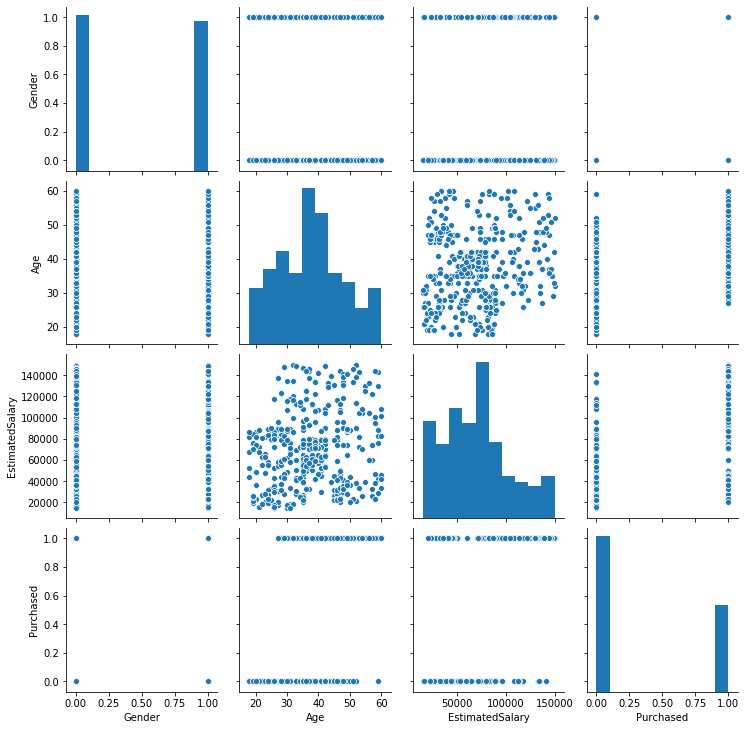

In [21]:
import seaborn as sns
sns.pairplot(data)

In [22]:
X=data.drop(columns="Purchased")
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [23]:
Y=data["Purchased"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

**Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
Y_test_scaled=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Predicting the Test set results**

In [27]:
Y_predict=KNN.predict(X_test)
Y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

**Making the Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predict)

print("Confusion matrix\n\n",cm)
print("\nTrue Positive(TP):",cm[0,0])
print("\nTrue Negative(TN):",cm[1,1])
print("\nFalse Positive(TP):",cm[0,1])
print("\nFalse Positive(TP):",cm[1,0])

Confusion matrix

 [[46  7]
 [10 17]]

True Positive(TP): 46

True Negative(TN): 17

False Positive(TP): 7

False Positive(TP): 10


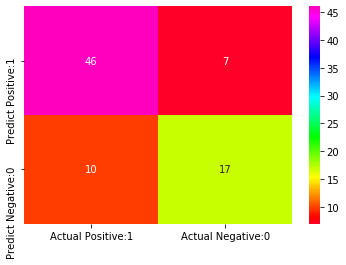

In [29]:
cm_matrix=pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],
                       index=["Predict Positive:1","Predict Negative:0"])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap="gist_rainbow")

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.71      0.63      0.67        27

    accuracy                           0.79        80
   macro avg       0.76      0.75      0.76        80
weighted avg       0.78      0.79      0.78        80



Test set accuracy: 0.79
Train set auc: 0.75


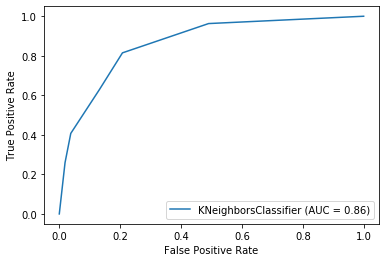

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
acc = accuracy_score(Y_test, Y_predict)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(Y_test, Y_predict)
print("Train set auc: {:.2f}".format(acc))
plot_roc_curve(KNN, X_test, Y_test)